# Predicting Covid-19 deaths based on Patient Demgraphics 

## Introduction

In this project, we will analyze and explore a novel yet insightful covid-19 dataset. The goal of this project is to predict the mortality of the patients' based on their democraphics and health status. Covid-19 being a fairly recent virus, any insights would be helful to understand potential disease risk and causes. Dr.cowen states that “there's been a huge hunger on the part of clinicians for this information” (Butterfield, 2013) These algorithms could be used in assessing the safety and quality of care provided based on the patient’s risk assessment. 

Therefore, we are trying to understand, is there a correlation between death and the other variables (eg. gender, age, ethnicity)? What are the current trends of the death variable? **Yet, our main question relies, can we predict a patients' mortality?** 

## Content

In this report, we will discuss the following parts:

- [Introduction](#Introduction)
- [Importing Libraries](#Importing-libraries)
- [Data Collection](#Data-Collection)
- [Data Cleaning](#Data-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Modeling](#Modeling)
- [Findings](#Findings)
- [Conclusion](#Conclusion)
- [References](#References)

## Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
import seaborn as sns
%matplotlib inline

In [2]:
pip install missingno


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: six in c:\users\ya200\anaconda3\lib\site-packages (from cycler>=0.10->matplotlib->missingno) (1.15.0)



In [3]:
import missingno as msno

## Data Collection 

The <a href="https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data/vbim-akqf"> dataset </a>  we are working with is provided from <a href="https://www.cdc.gov">Centers for Disease Control and Prevention</a>. This organization runs a COVID-19 case surveillance system database that is based in the US. 

CDC have worked on developing technology to help ensure that disease reporting systems are integrated in US states. 
This reporting system initiated this rich dataset that includes individual-level data reported of confirmed and probable cases of covid-19. The dataset consist of 11 columns labelled as:

- cdc_report_dt: Initial case report date to CDC
- pos_spec_dt: Date of first positive specimen collection
- onset_dt: Symptom onset date, if symptomatic
- current_status: Case Status: Laboratory-confirmed case; Probable case
- sex: Male; Female; Unknown; Other
- age_group: 0 - 9 Years; 10 - 19 Years; 20 - 39 Years; 40 - 49 Years; 50 - 59 Years; 60 - 69 Years; 70 - 79     Years; 80 + Years
- Race and ethnicity (combined): Hispanic/Latino; American Indian / Alaska Native, Non-Hispanic; Asian, Non-Hispanic; Black, Non-Hispanic; Native Hawaiian / Other Pacific Islander, Non-Hispanic; White, Non-Hispanic; Multiple/Other, Non-Hispanic
- hosp_yn: Hospitalization status
- icu_yn: ICU admission status (intensive care unit)
- death_yn: Death status
- medcond_yn: Presence of underlying comorbidity or disease
    


In [28]:
data = pd.read_csv("COVID-19_Case_Surveillance_Public_Use_Data (1).csv");
data.head()
data.info()

C:\Users\ya200\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760066 entries, 0 to 5760065
Data columns (total 11 columns):
 #   Column                         Dtype 
---  ------                         ----- 
 0   cdc_report_dt                  object
 1   pos_spec_dt                    object
 2   onset_dt                       object
 3   current_status                 object
 4   sex                            object
 5   age_group                      object
 6   Race and ethnicity (combined)  object
 7   hosp_yn                        object
 8   icu_yn                         object
 9   death_yn                       object
 10  medcond_yn                     object
dtypes: object(11)
memory usage: 483.4+ MB


## Data Cleaning

Judging from the info of the data, there are 5 million entries of data that has missing values. Given the huge dataset, we have the flexibility to eliminate all null values and drop rows with missing data. We will start by dropping the pos_spec_dt column since as shown in the graph below its almost always null. We will also drop onset_dt since there are many missing values as well. We chose to drop cdc_report_dt because it doesn't have any importance anymore. 

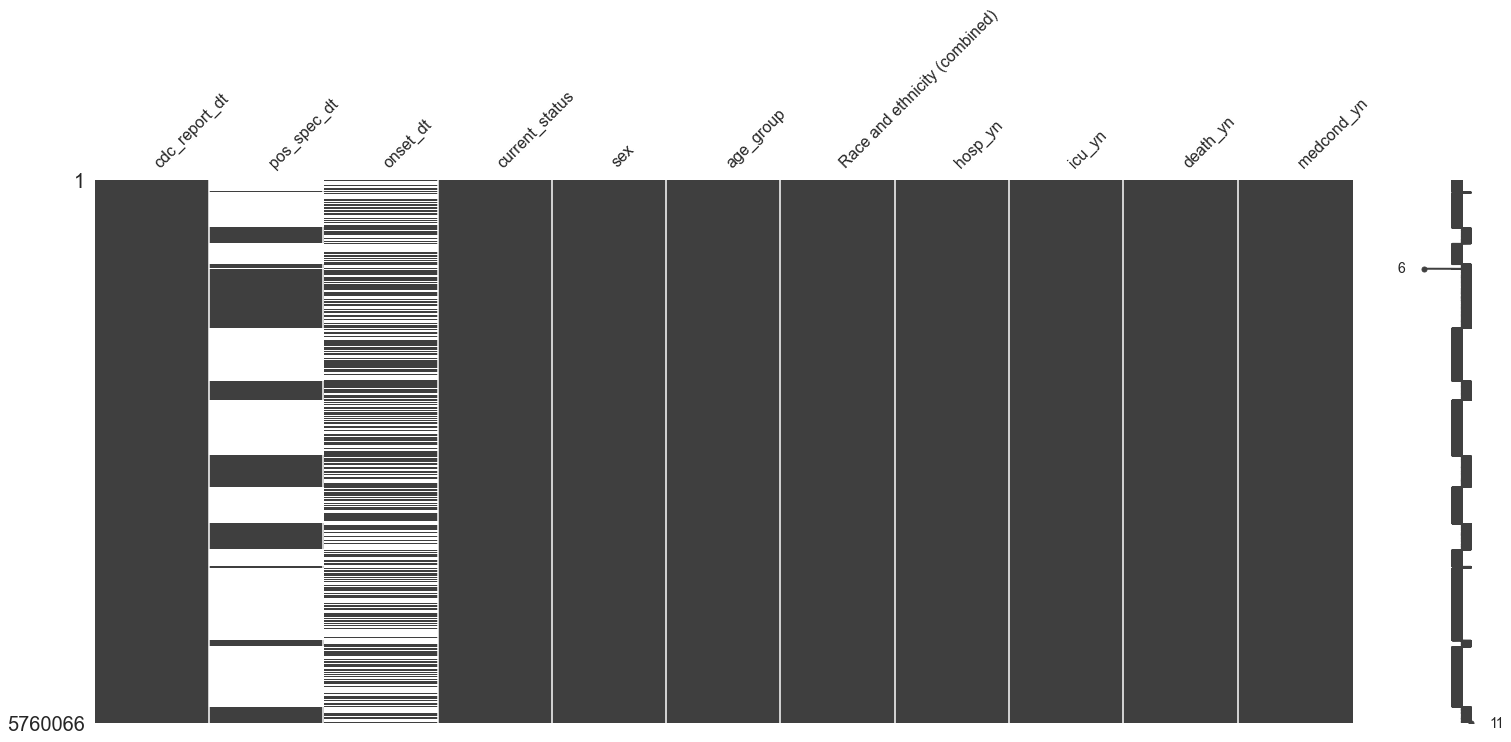

In [29]:
msno.matrix(data) 

After loading the file and viewing the dataset, we noticed a lot of missing data. The missing data are in the form of Nan, 'missing' or 'unknown'. Because we have more than 5 million instances, we decided that it is safe to drop all rows containing Nan. There's a specific column 'pos_spec_dt' which is Nan for all rows so we dropped it as well.

In [30]:
#drop null values
data=data.dropna()
data.head()
#drop the column pos_spec_dt
data=data.drop('pos_spec_dt', axis=1)
data = data.drop(['cdc_report_dt', 'onset_dt'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 924150 entries, 131296 to 5760063
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   current_status                 924150 non-null  object
 1   sex                            924150 non-null  object
 2   age_group                      924150 non-null  object
 3   Race and ethnicity (combined)  924150 non-null  object
 4   hosp_yn                        924150 non-null  object
 5   icu_yn                         924150 non-null  object
 6   death_yn                       924150 non-null  object
 7   medcond_yn                     924150 non-null  object
dtypes: object(8)
memory usage: 63.5+ MB


After dropping these two columns, we are working with 500 thousands remaining entries. Although NA values are dropped, there are still entries labelled as unknown or missing that we need to filter out.

In [31]:
pd.DataFrame(data.sex.value_counts())

,sex
Female,484602
Male,432394
Unknown,5796
Missing,1358


In [32]:
search_values= ['Missing', 'Unknown']
Missingdata=data[data.sex.str.contains('|'.join(search_values ))]
Missingdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7154 entries, 131498 to 5758804
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   current_status                 7154 non-null   object
 1   sex                            7154 non-null   object
 2   age_group                      7154 non-null   object
 3   Race and ethnicity (combined)  7154 non-null   object
 4   hosp_yn                        7154 non-null   object
 5   icu_yn                         7154 non-null   object
 6   death_yn                       7154 non-null   object
 7   medcond_yn                     7154 non-null   object
dtypes: object(8)
memory usage: 503.0+ KB


We can see that there are 67 thousand rows containing unknown or missing values.

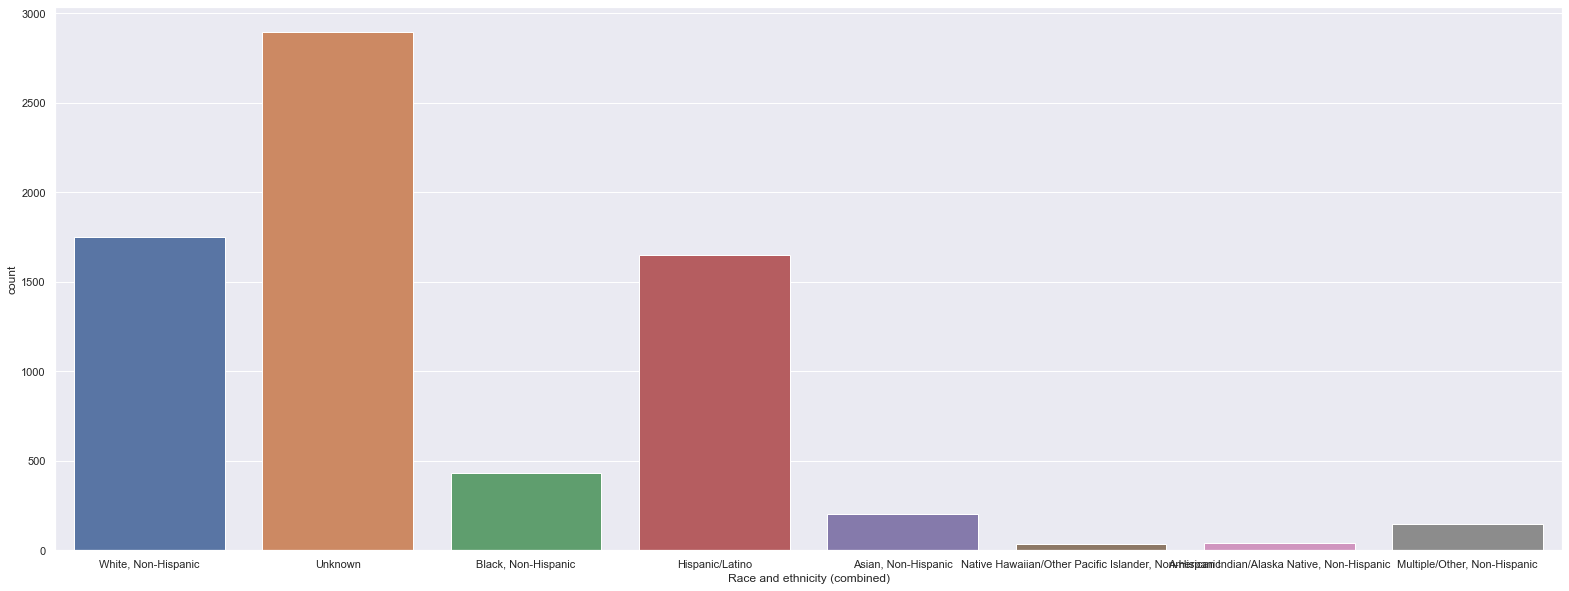

In [33]:
sns.set(rc={'figure.figsize':(27,10)})
sns.countplot(Missingdata['Race and ethnicity (combined)'])

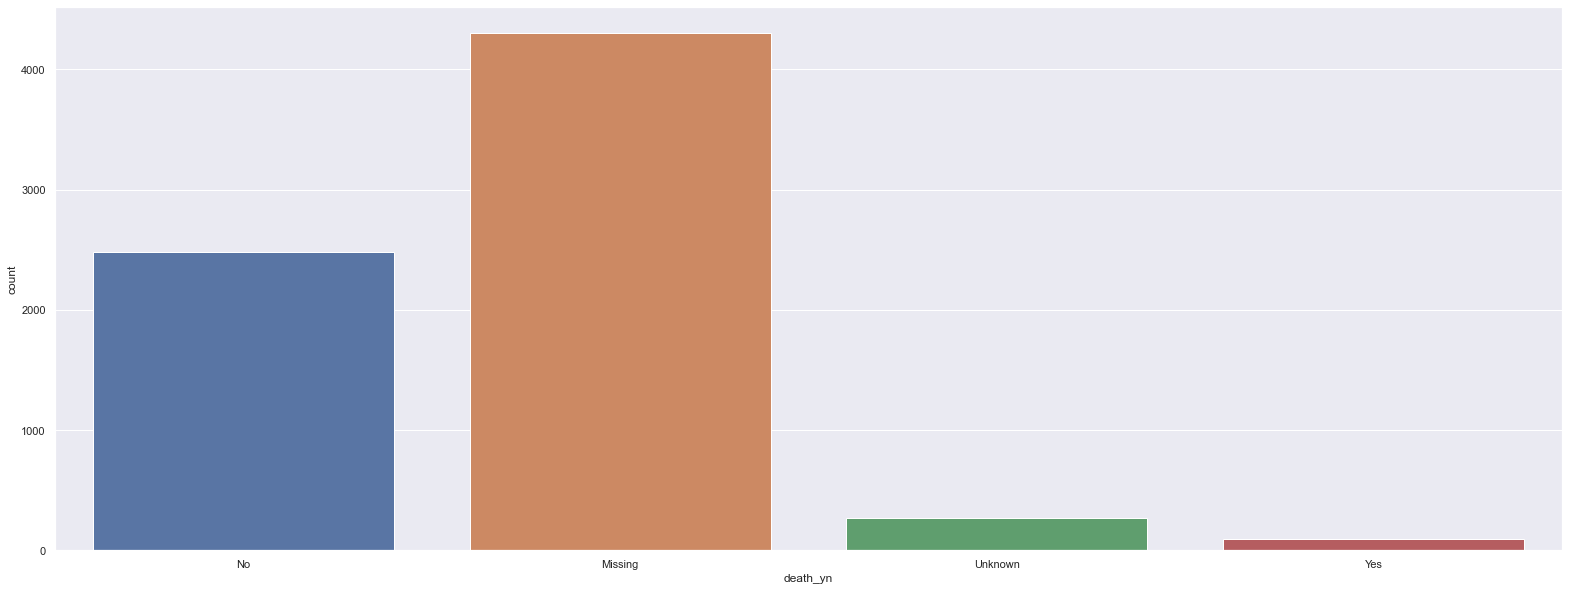

In [34]:
sns.countplot(Missingdata['death_yn'])

These distributions of variables with missing data shows us that a huge portion of patients didn't have their ethnicity/race logged in. Similarly with the death varible, a lot of the entries did not have the death variable logged in. This pose a challenge to the modeling part because these missing variables cause data imbalance that skew the distributions of the varibales. However, for the sake of practicality, we will continue drop the rows with missing data to start visualizing the distributions and correlations.

In [35]:
#how many true cases before dropping mssing and unkown
rslt_df = data[data['death_yn'] == 'Yes'] 
rslt_df

,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
133006,Laboratory-confirmed case,Female,0 - 9 Years,"Black, Non-Hispanic",Yes,No,Yes,No
140130,Laboratory-confirmed case,Male,0 - 9 Years,Unknown,No,Missing,Yes,No
514420,Laboratory-confirmed case,Male,20 - 29 Years,"White, Non-Hispanic",Yes,Unknown,Yes,Unknown
520311,Laboratory-confirmed case,Male,20 - 29 Years,"Multiple/Other, Non-Hispanic",No,Missing,Yes,Yes
521349,Laboratory-confirmed case,Male,20 - 29 Years,Hispanic/Latino,Yes,No,Yes,No
...,...,...,...,...,...,...,...,...
5759879,Laboratory-confirmed case,Male,70 - 79 Years,"White, Non-Hispanic",Yes,Unknown,Yes,Yes
5759886,Laboratory-confirmed case,Male,70 - 79 Years,Hispanic/Latino,Yes,Missing,Yes,Missing
5759942,Laboratory-confirmed case,Male,70 - 79 Years,Unknown,Yes,Missing,Yes,Missing
5759979,Laboratory-confirmed case,Female,70 - 79 Years,"White, Non-Hispanic",No,Missing,Yes,Yes


Even after dropping Nan records, there are still missing values. We wanted to clean the data further so we dropped all missing data.

In [36]:
todrop= ['Missing', 'Unknown']

data = data[~data['age_group'].isin(todrop) & ~data['sex'].isin(todrop) & ~data['Race and ethnicity (combined)'].isin(todrop) & ~data['hosp_yn'].isin(todrop) & ~data['icu_yn'].isin(todrop) & ~data['death_yn'].isin(todrop) & ~data['medcond_yn'].isin(todrop)]
data.head()
data.info

<bound method DataFrame.info of                     current_status     sex      age_group  \
131313   Laboratory-confirmed case  Female    0 - 9 Years   
131372   Laboratory-confirmed case    Male    0 - 9 Years   
131382   Laboratory-confirmed case    Male    0 - 9 Years   
131397   Laboratory-confirmed case    Male    0 - 9 Years   
131399   Laboratory-confirmed case    Male    0 - 9 Years   
...                            ...     ...            ...   
5760005  Laboratory-confirmed case  Female  70 - 79 Years   
5760008  Laboratory-confirmed case  Female  70 - 79 Years   
5760024  Laboratory-confirmed case  Female  70 - 79 Years   
5760025  Laboratory-confirmed case  Female  70 - 79 Years   
5760063  Laboratory-confirmed case  Female  70 - 79 Years   

        Race and ethnicity (combined) hosp_yn icu_yn death_yn medcond_yn  
131313                Hispanic/Latino      No     No       No         No  
131372                Hispanic/Latino      No     No       No         No  
131382    

The Yes cases for death are very critical for our classification and analysis so we checked the number of instances that are true cases after dropping rows containing Nan, missing and unkown data. 

In [37]:
#final number of true cases
data.death_yn.value_counts()

No     180924
Yes     11854
Name: death_yn, dtype: int64

Because we dropped a large proportion of the dataset and we didn't have much true cases to start with, the ratio of false cases to true cases is really high. This results in class imbalance and therefore leads to overfitting. Because the model will be fed much more instances of false cases, the model will be trained to only predict such class. In order to prevent this, we used a predefined function called resample to increase instances of the minority class.

In [38]:
df_majority = data.loc[data["death_yn"] == 'No']
df_minority = data.loc[data["death_yn"] == 'Yes']
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=100000,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [39]:
df_upsampled 

,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
131313,Laboratory-confirmed case,Female,0 - 9 Years,Hispanic/Latino,No,No,No,No
131372,Laboratory-confirmed case,Male,0 - 9 Years,Hispanic/Latino,No,No,No,No
131382,Laboratory-confirmed case,Male,0 - 9 Years,Hispanic/Latino,No,No,No,No
131397,Laboratory-confirmed case,Male,0 - 9 Years,"White, Non-Hispanic",No,No,No,Yes
131399,Laboratory-confirmed case,Male,0 - 9 Years,"White, Non-Hispanic",No,No,No,No
...,...,...,...,...,...,...,...,...
3880509,Laboratory-confirmed case,Female,60 - 69 Years,"White, Non-Hispanic",Yes,No,Yes,Yes
1153466,Laboratory-confirmed case,Male,40 - 49 Years,"Black, Non-Hispanic",Yes,Yes,Yes,Yes
914535,Laboratory-confirmed case,Male,70 - 79 Years,"Multiple/Other, Non-Hispanic",Yes,Yes,Yes,Yes
3764588,Laboratory-confirmed case,Male,80+ Years,"White, Non-Hispanic",Yes,No,Yes,No


Now the ratio of false cases to true cases is reasonable for a model to learn how to classify the data. 

In [40]:
#number of true cases after upsampling
df_upsampled.death_yn.value_counts()

No     180924
Yes    100000
Name: death_yn, dtype: int64

## Exploratory Data Analysis

In this section, we will explore the trends and correlations of the variables against the death variable. We will first look at the distributions of our variables. Since all the variables are categorical, we will create bar charts.

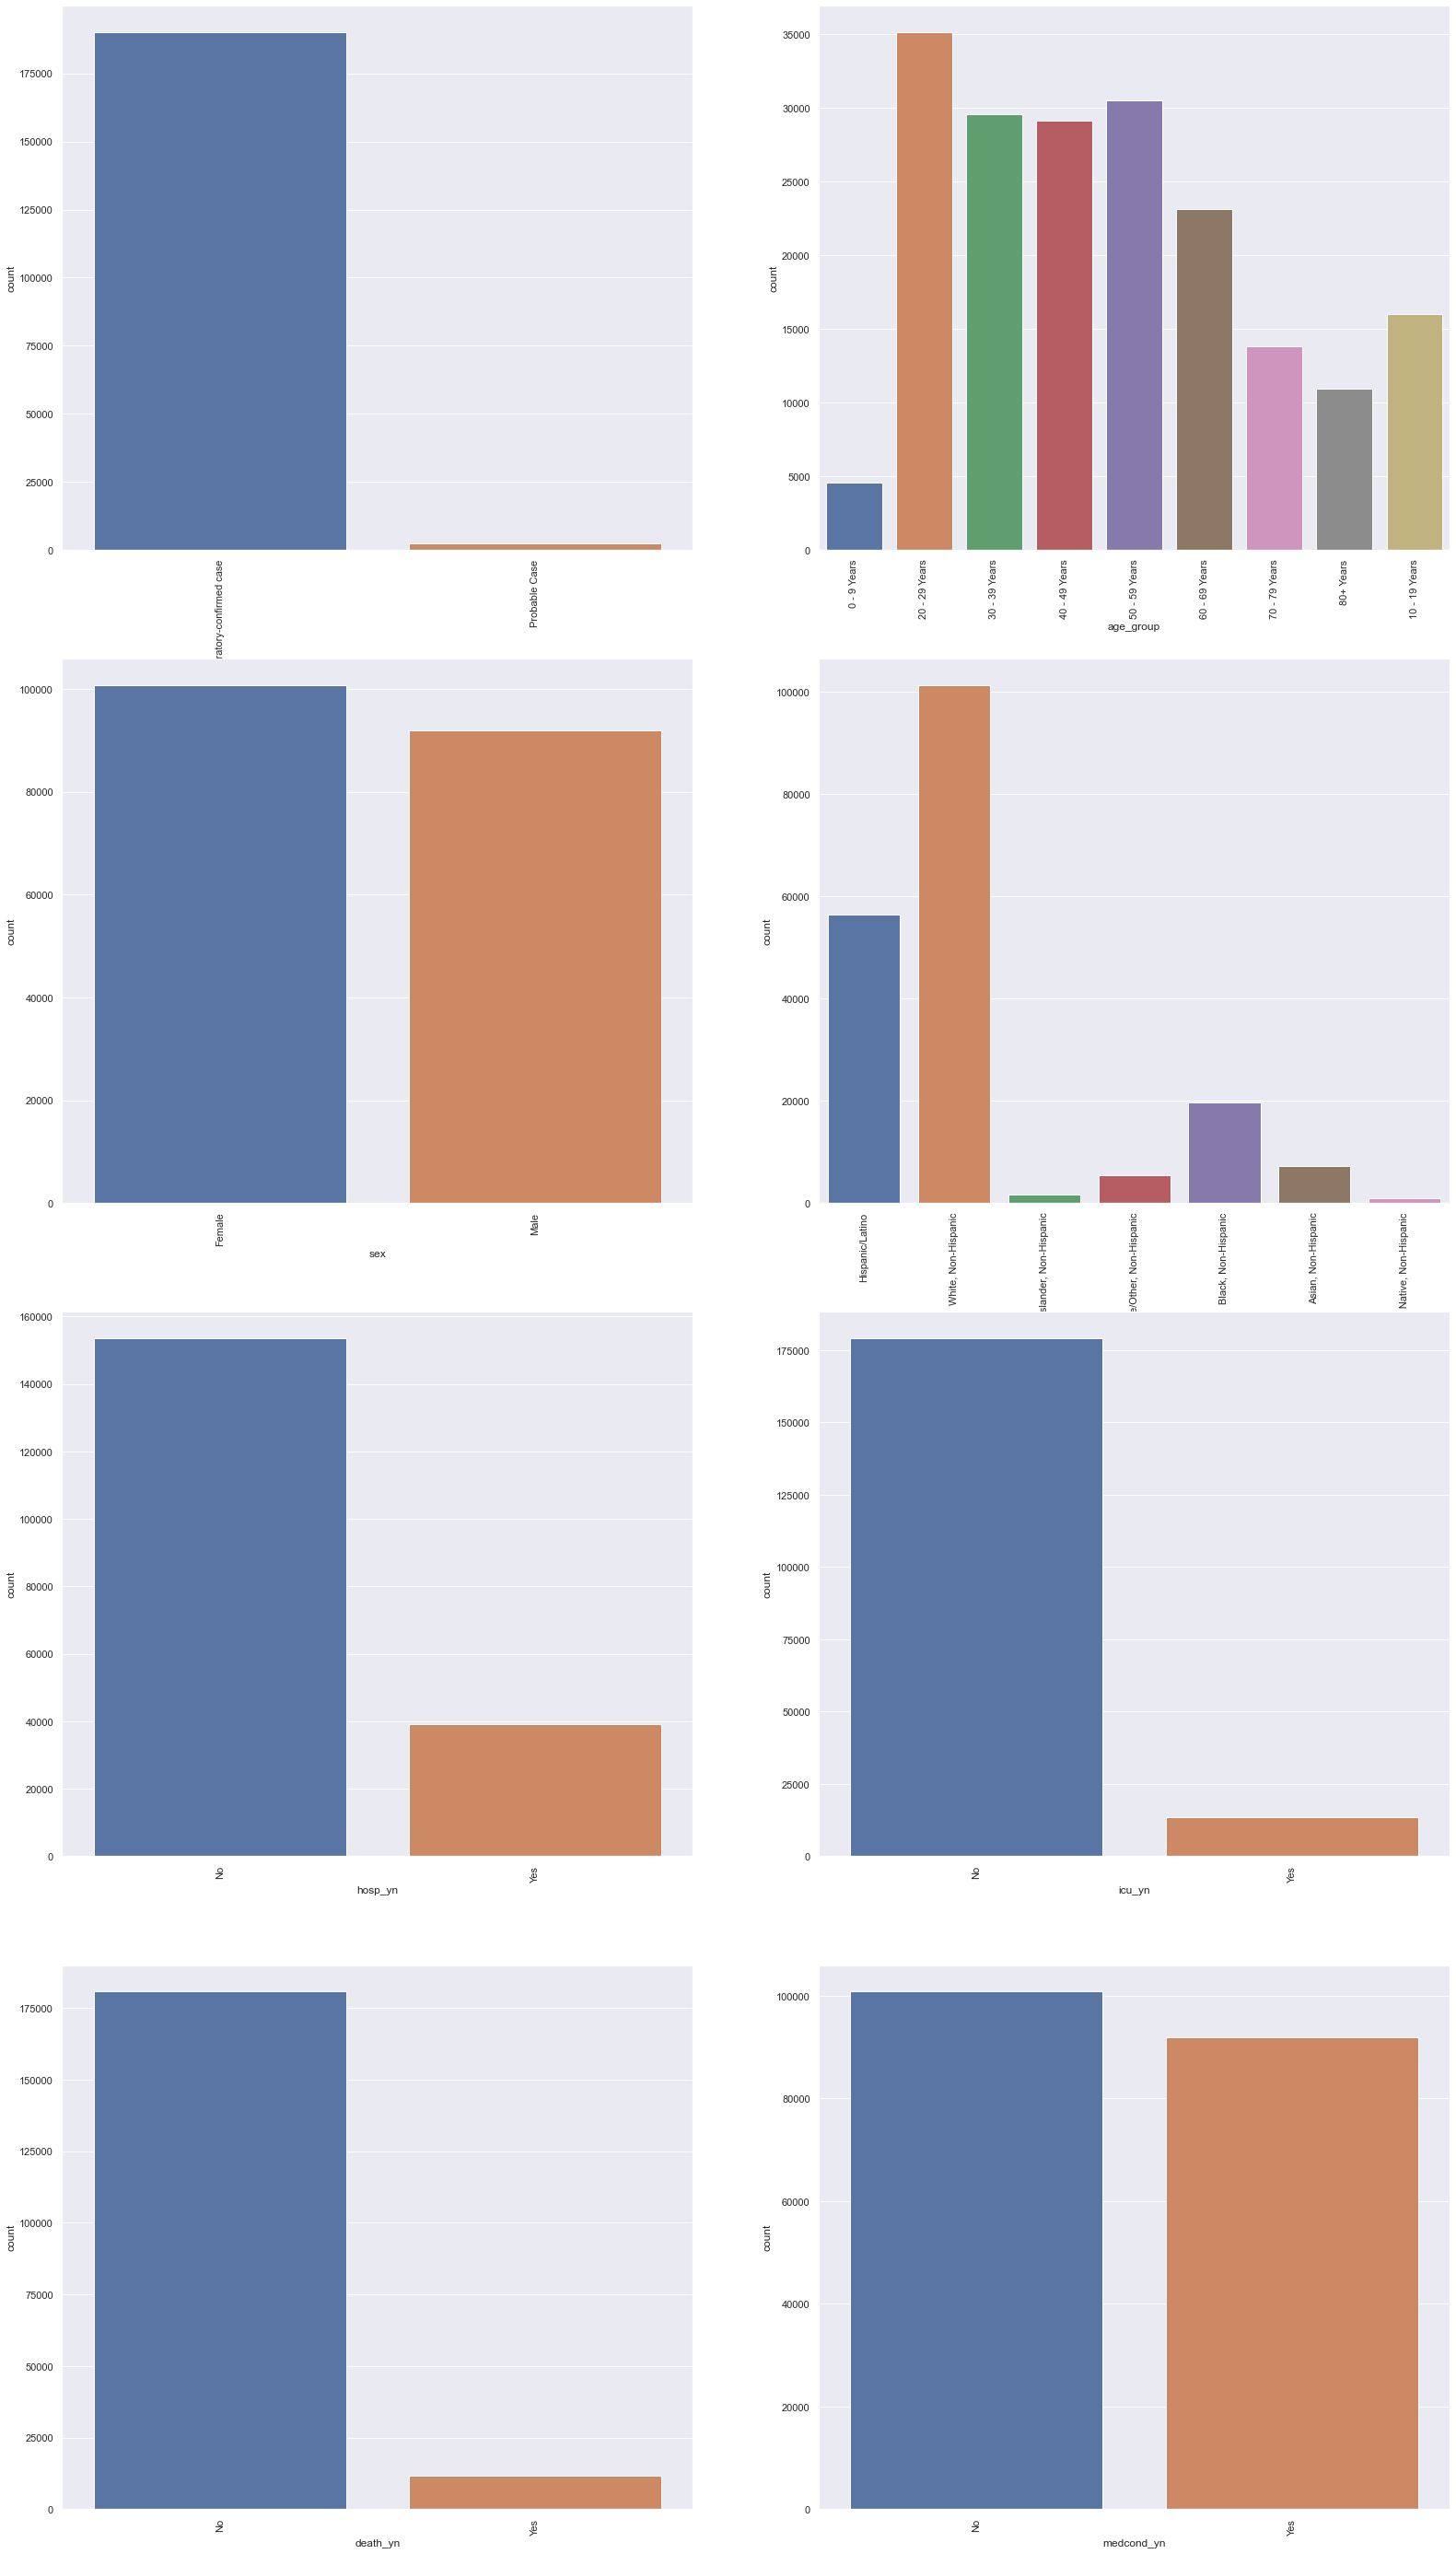

In [41]:
# distributions by category
categorical = [
  'current_status', 'age_group', 'sex', 'Race and ethnicity (combined)', 'hosp_yn', 'icu_yn', 'death_yn', 'medcond_yn'
]
fig, ax = plt.subplots(4,2, figsize=(27, 50))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(data[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

Throught the analysis of the distributions we can make few observations:

- Most of the registered covid cases are of people of age  20-29.
- A huge amount of the registered cases are people of the race white.
- Approxiametly, at least 6% of the registered patients are dead. 
- There are more cases of females than males in this dataset. 


### Exploring the variables against the death variable

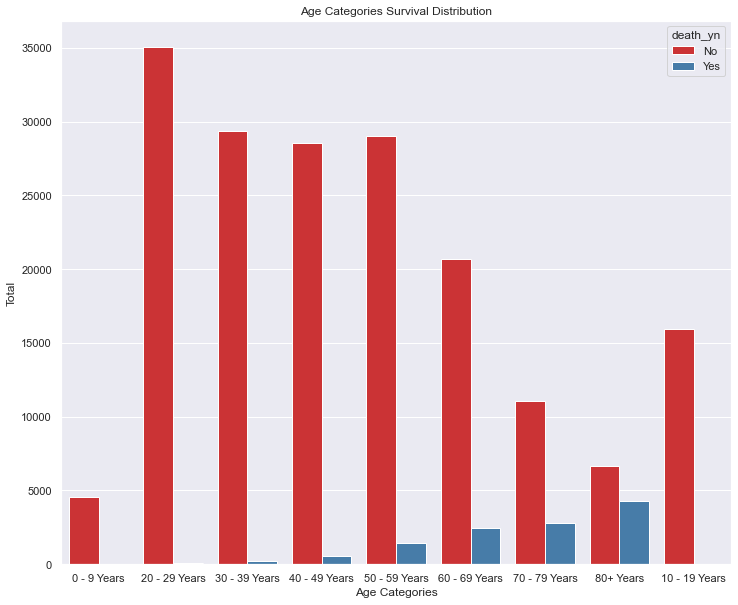

In [42]:
sns.set(rc={'figure.figsize':(12,10)})
ax = sns.countplot(x = 'age_group',  data = data, hue = 'death_yn', palette = 'Set1')

ax.set(xlabel='Age Categories', ylabel='Total',
       title="Age Categories Survival Distribution")

plt.show()

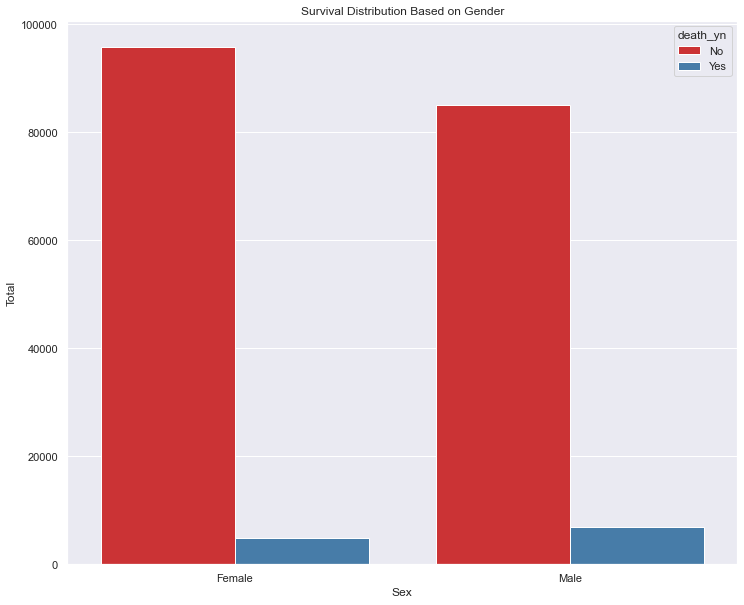

In [43]:
sns.set(rc={'figure.figsize':(12,10)})
ax = sns.countplot(x = 'sex',  data = data, hue = 'death_yn', palette = 'Set1')

ax.set(xlabel='Sex', ylabel='Total',
       title="Survival Distribution Based on Gender")

plt.show()

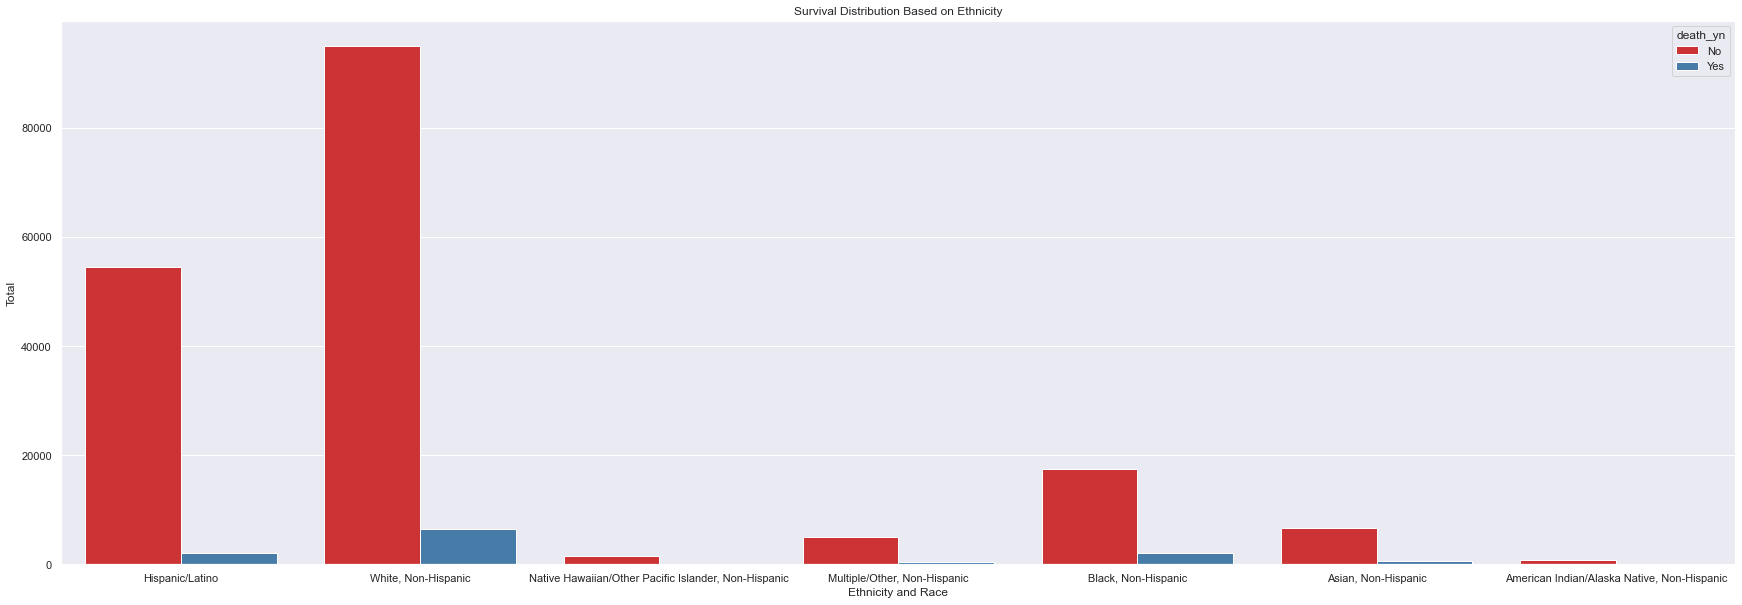

In [44]:
sns.set(rc={'figure.figsize':(30,10)})
ax = sns.countplot(x = 'Race and ethnicity (combined)',  data = data, hue = 'death_yn', palette = 'Set1')

ax.set(xlabel='Ethnicity and Race', ylabel='Total',
       title="Survival Distribution Based on Ethnicity")

plt.show()

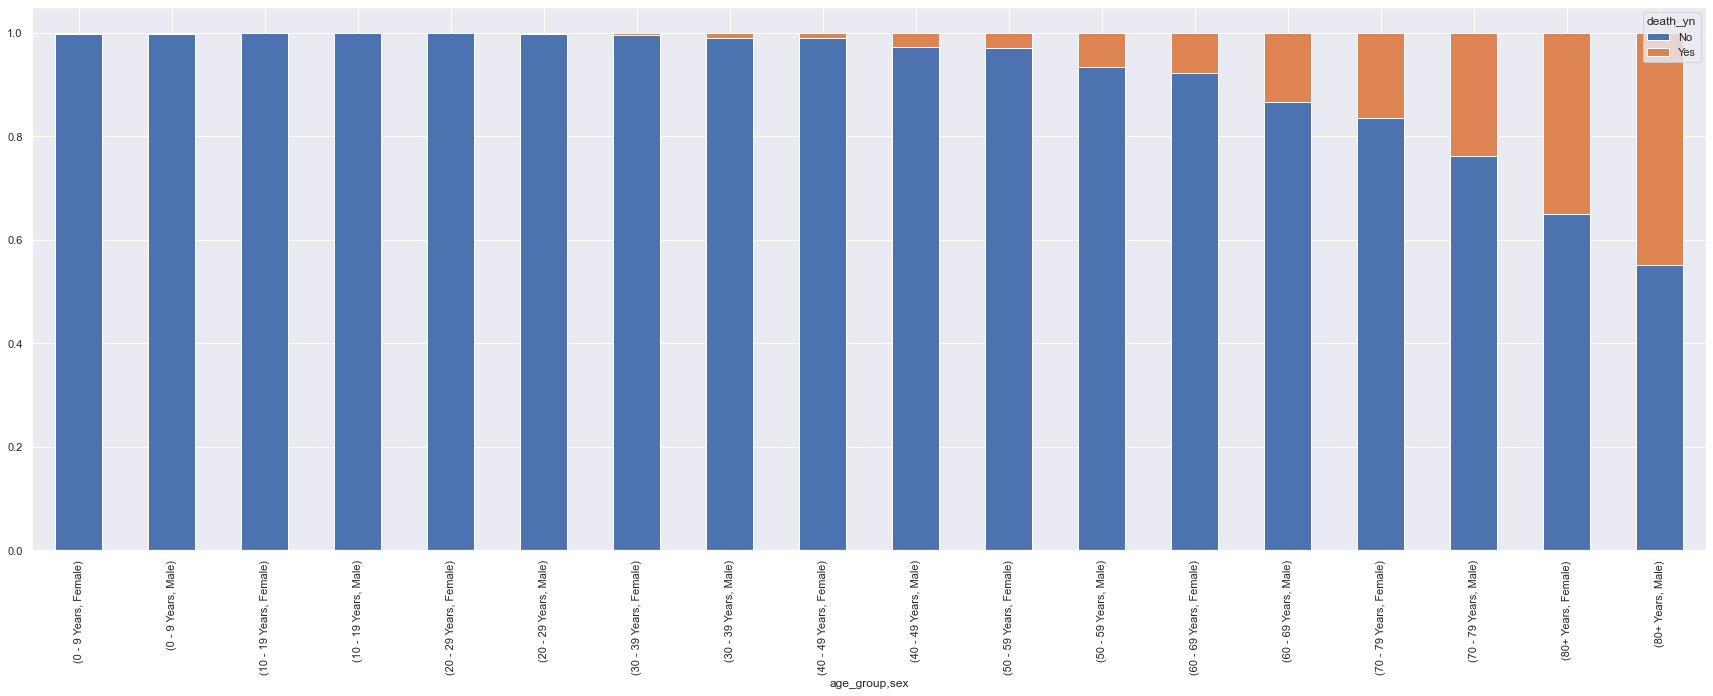

In [45]:
byage=data.groupby(['age_group','sex']).death_yn.value_counts(normalize=True)
byage.unstack().plot(kind="bar", stacked= True)

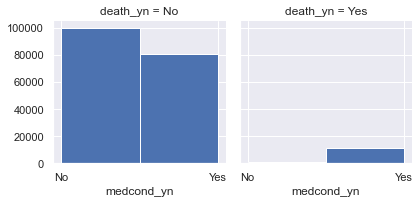

In [46]:
g = sns.FacetGrid(data, col='death_yn')
g.map(plt.hist, 'medcond_yn', bins=2)

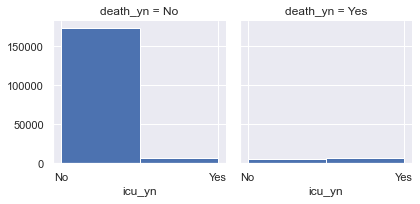

In [47]:
g = sns.FacetGrid(data, col='death_yn')
g.map(plt.hist, 'icu_yn', bins=2)

Based on the following graphs, we can make the following points:

- Patients that are older than 80 had the highest number of deaths
- Males had more deaths than female even though the total number of female patients was greater
- Patients of the white race had the highest cases of death, but that is because they were the most represented in this dataset
- Almost all of the dead patients had an underlying comorbid diseases
- Most of the dead patients got registered in the intensive care unit

### Correlation between variables

To plot the correlation between the vaiables, we will transform the values of the variables into numbers since we have categorical variables.

In [50]:
data3=data
data3.sex.replace(('Female','Male', 'Other'), (0,1,2), inplace = True)
data3.current_status.replace(('Laboratory-confirmed case','Probable Case'), (0,1), inplace = True)
data3.age_group.replace(('0 - 9 Years','10 - 19 Years','20 - 29 Years','30 - 39 Years','40 - 49 Years','50 - 59 Years','60 - 69 Years','70 - 79 Years','80+ Years'), (0,1,2,3,4,5,6,7,8), inplace = True)
data3['Race and ethnicity (combined)'].replace(('American Indian/Alaska Native, Non-Hispanic','Asian, Non-Hispanic','Black, Non-Hispanic','Hispanic/Latino','Multiple/Other, Non-Hispanic','Native Hawaiian/Other Pacific Islander, Non-Hispanic','White, Non-Hispanic'), (0,1,2,3,4,5,6), inplace = True)
data3.hosp_yn.replace(('No','Yes'), (0,1), inplace = True)
data3.icu_yn.replace(('No','Yes'), (0,1), inplace = True)
data3.death_yn.replace(('No','Yes'), (0,1), inplace = True)
data3.medcond_yn.replace(('No','Yes'), (0,1), inplace = True)



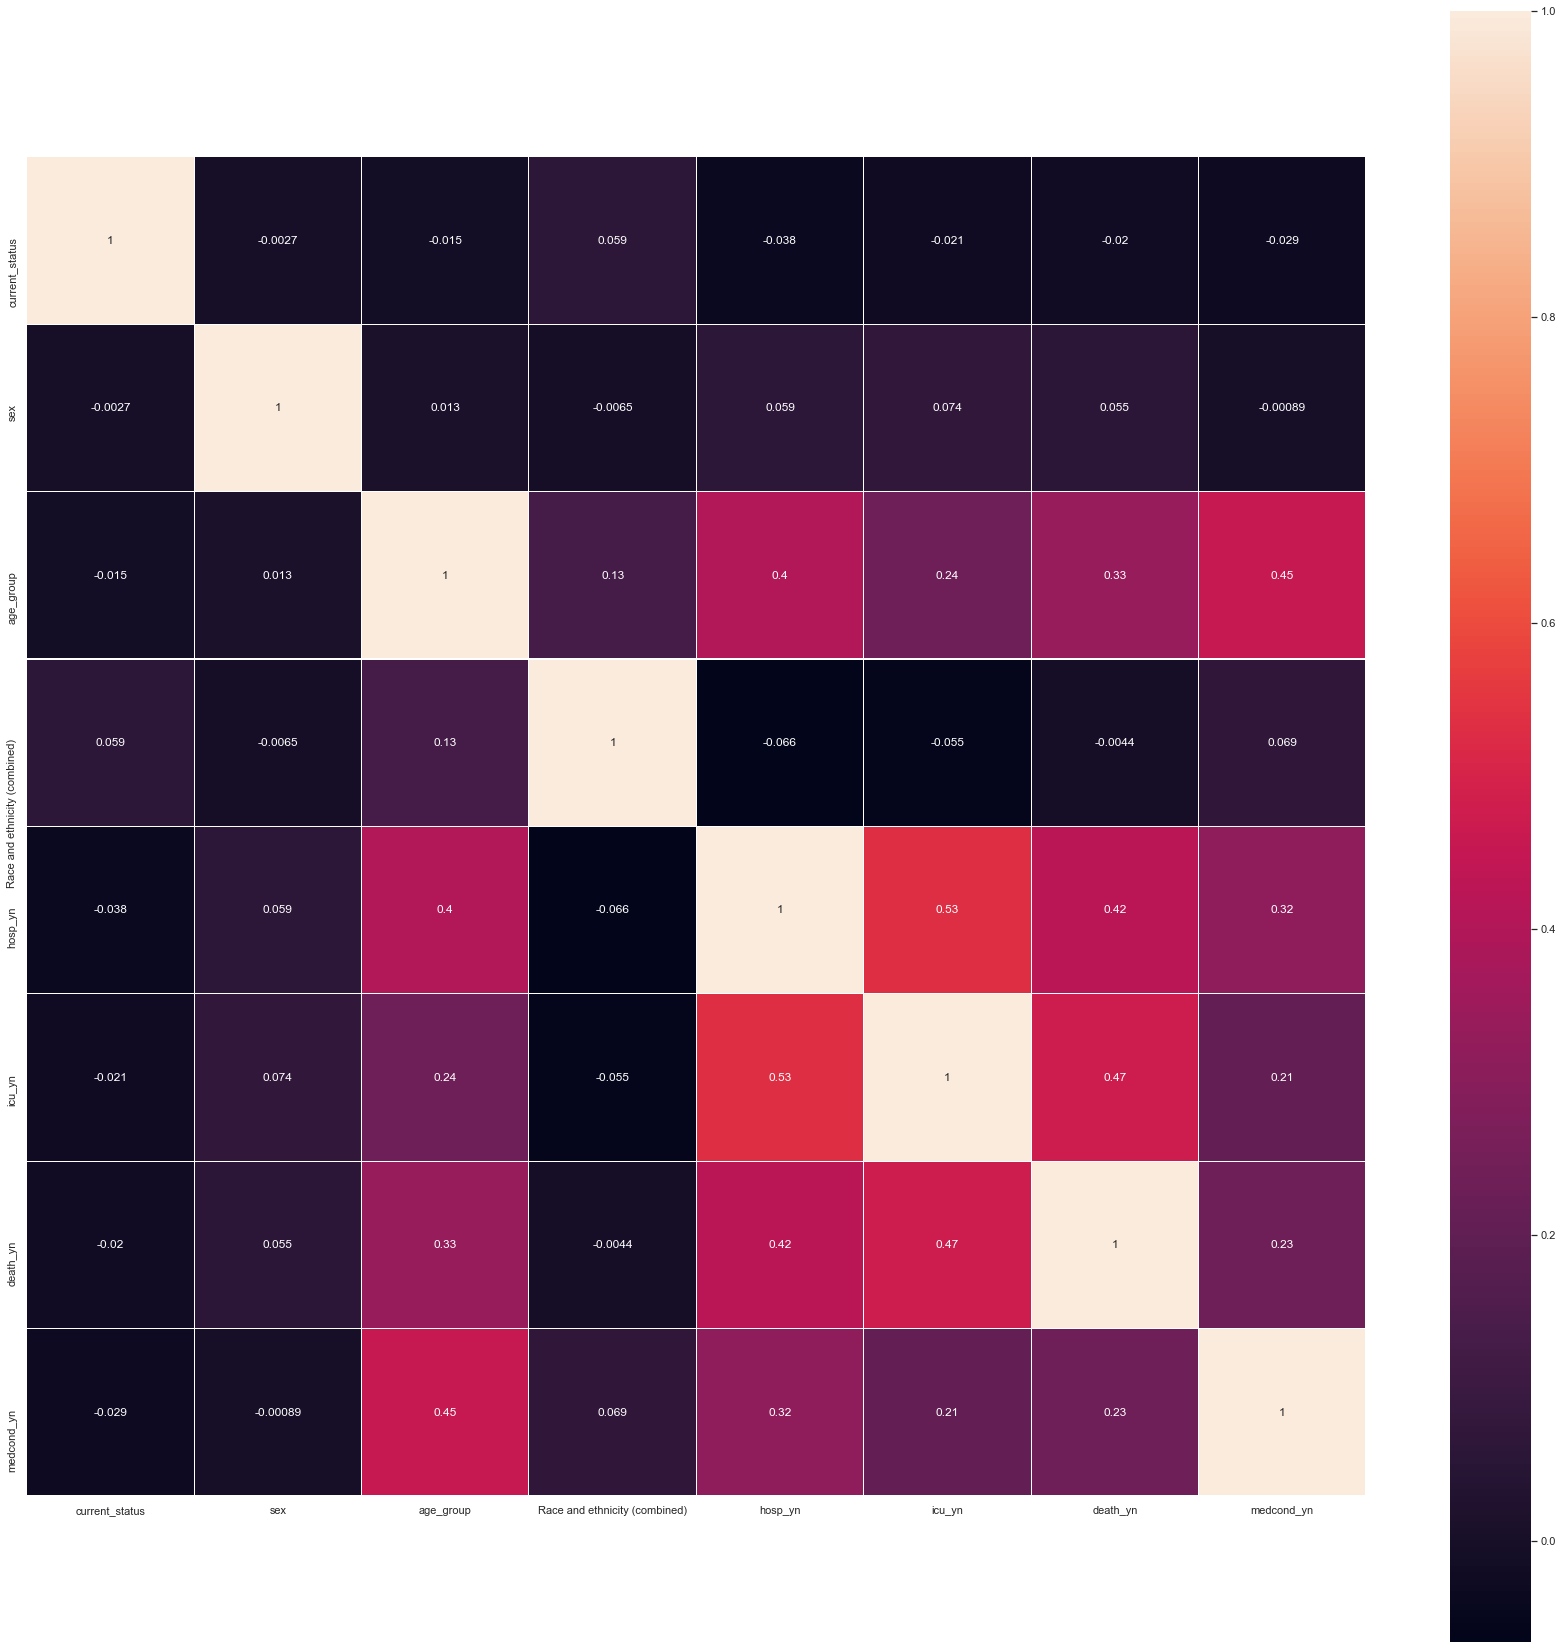

In [51]:
plt.figure(figsize=(30,30))
sns.heatmap(data3.astype(float).corr(),linewidths=0.1, 
            square=True,  linecolor='white', annot=True)
plt.show()

From the correlation heat map, we focused on the death variable which had the highest correlations with the intensive care unit, hospitalization and gender variables. This makes since because icu and hospitalization means that the patient was in a critical condition. From this analysis, we identified the importance of some features that we we will emphasize in our training modeling.

## Modelling

### Feature Vectoring & Training

We will use one-hot encoding of the data to convert our categorical variables into a numerical representation without an arbitrary ordering

In [11]:
d = pd.get_dummies(df_upsampled, columns =['current_status', 'sex', 'age_group', 'Race and ethnicity (combined)', 'hosp_yn', 'icu_yn', 'medcond_yn'])

Now we separate the data into the features and targets.We will also convert the Pandas dataframes to Numpy arrays.

In [12]:
labels = np.array(np.where(d.death_yn.values == 'Yes', 1, 0))
features = d.drop(['death_yn'], axis = 1)
# features = features.drop(['age_group_Unknown'], axis = 1)
feature_list = list(features.columns)
features = np.array(features)
print(labels.shape)
print(features.shape)


train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.1, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

(280935,)
(280935, 26)
Training Features Shape: (252841, 26)
Training Labels Shape: (252841,)
Testing Features Shape: (28094, 26)
Testing Labels Shape: (28094,)


In [13]:
feature_list

['current_status_Laboratory-confirmed case',
 'current_status_Probable Case',
 'sex_Female',
 'sex_Male',
 'age_group_0 - 9 Years',
 'age_group_10 - 19 Years',
 'age_group_20 - 29 Years',
 'age_group_30 - 39 Years',
 'age_group_40 - 49 Years',
 'age_group_50 - 59 Years',
 'age_group_60 - 69 Years',
 'age_group_70 - 79 Years',
 'age_group_80+ Years',
 'Race and ethnicity (combined)_American Indian/Alaska Native, Non-Hispanic',
 'Race and ethnicity (combined)_Asian, Non-Hispanic',
 'Race and ethnicity (combined)_Black, Non-Hispanic',
 'Race and ethnicity (combined)_Hispanic/Latino',
 'Race and ethnicity (combined)_Multiple/Other, Non-Hispanic',
 'Race and ethnicity (combined)_Native Hawaiian/Other Pacific Islander, Non-Hispanic',
 'Race and ethnicity (combined)_White, Non-Hispanic',
 'hosp_yn_No',
 'hosp_yn_Yes',
 'icu_yn_No',
 'icu_yn_Yes',
 'medcond_yn_No',
 'medcond_yn_Yes']

Here we standardize the values of each feature in the data to have mean 0 and variance 1, using the Standard Scaler.

In [14]:
""" Standardisation """ 
Standardisation = preprocessing.StandardScaler() 
train_features = Standardisation.fit_transform(train_features) 
train_features

array([[ 0.10191146, -0.10191146,  1.0249958 , ..., -0.53030754,
        -0.78208265,  0.78208265],
       [ 0.10191146, -0.10191146, -0.97561376, ..., -0.53030754,
         1.27863724, -1.27863724],
       [ 0.10191146, -0.10191146, -0.97561376, ..., -0.53030754,
         1.27863724, -1.27863724],
       ...,
       [ 0.10191146, -0.10191146,  1.0249958 , ..., -0.53030754,
        -0.78208265,  0.78208265],
       [ 0.10191146, -0.10191146, -0.97561376, ..., -0.53030754,
        -0.78208265,  0.78208265],
       [ 0.10191146, -0.10191146,  1.0249958 , ..., -0.53030754,
        -0.78208265,  0.78208265]])

## Building & Evaluating classifiers

Now that our testing and training data are ready, we will experiment with different types of classifiers like logistic regression, random forest and will try support vector machine. Then we evaluated the performance of the classier through calculating the f1 score, the accuracy, the precision and the recall. We are also using 10 fold cross validation to evaluate the models.


### Using booster to solve imblanace issue

Before trying to resample the data and lower the ratio between true and false cases, we trying building a xgboost and using it to train and predict data. Unfortunately, we ran into issues and decided to go with resampling which is done in the data preparation section.  

In [15]:
# pip install xgboost
# import xgboost as xgb
# from numpy import loadtxt
# from xgboost import XGBClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# # load data
# dataset = xgb.DMatrix('COVID-19_Case_Surveillance_Public_Use_Data (1).csv?format=csv&label_column=0')
# # split data into X and y
# X = dataset[['current_status', 'sex', 'age_group','Race and ethnicity (combined)', 'hosp_yn', 'icu_yn', 'medcond_yn']]
# Y = dataset['death_yn']
# num_round = 10
# bst = xgb.train(param, dtrain, num_round, evallist)

### Logistic Regression

In [16]:
logisticRegr = LogisticRegression()
logisticRegr.fit(train_features, train_labels) 

LogisticRegression()

In [17]:
pred_lr = logisticRegr.predict(test_features)
prob_lr = logisticRegr.predict_proba(test_features)[::,1]

In [18]:
logisticRegr.score(test_features, test_labels)

0.7380935431052894

In [19]:
cm = confusion_matrix(test_labels, pred_lr)
cm

array([[17885,   167],
       [ 7191,  2851]], dtype=int64)

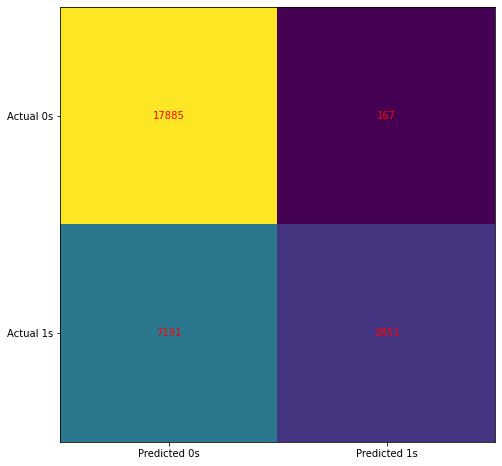

In [20]:
def plot_cm(test_labels, pred):
    cm = confusion_matrix(test_labels, pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
    plt.show()
    
plot_cm(test_labels, pred_lr)

In [21]:
def measures(test_labels, pred):
    tn, fp, fn, tp = confusion_matrix(test_labels, pred).ravel()

    accuracy= tp + tn / (tp + tn + fp + fn)
    precision= (tp) / (tp+fp)
    recall= (tp) / (tp+fn)
    f1= 2*((precision*recall)/(precision+recall))
    
    return accuracy, precision, recall, f1

accuracy_lr, precision_lr, recall_lr, f1_lr = measures(test_labels, pred_lr)

print ("accuracy: " + str(accuracy_lr))
print ("precision: " + str(precision_lr))
print ("recall: " + str(recall_lr))
print ("f1: " + str(f1_lr))

accuracy: 2851.6366127998863
precision: 0.9446653412856196
recall: 0.2839075881298546
f1: 0.4366003062787137


### Random Forest

In [22]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 30, random_state = 42)

# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(n_estimators=30, random_state=42)

In [23]:
pred_rf = rf.predict(test_features)

In [24]:
rf.score(test_features, test_labels)

0.3644356290651034

In [25]:
pred_rf = np.round(pred_rf)

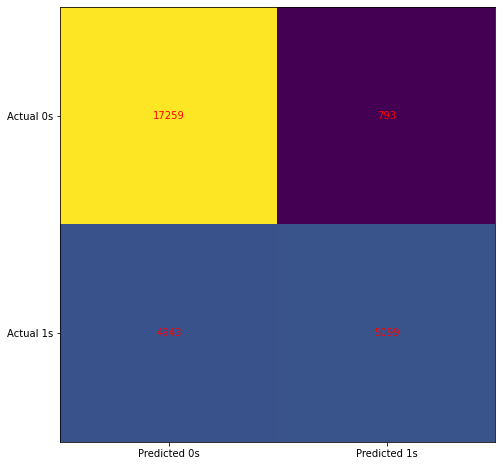

In [26]:
plot_cm(test_labels, pred_rf)

In [27]:
accuracy_rf, precision_rf, recall_rf, f1_rf = measures(test_labels, pred_rf)

print ("accuracy: " + str(accuracy_rf))
print ("precision: " + str(precision_rf))
print ("recall: " + str(recall_rf))
print ("f1: " + str(f1_rf))

accuracy: 5099.61433046202
precision: 0.8654107264086898
recall: 0.5077673770165305
f1: 0.6400150621312916


Based on the model scores, the random forest classifier is the best among the two. However, we still want to further validate the models using 10 fold cross validation. Accuracy and other metrics are highly biased upon how the split was performed, it depends upon whether the data set was shuffled, which part was taken for training and testing, how much, so on. Moreover, it is not representative of the model’s ability to generalize (Bose, 2019). This leads us to cross validation.

### 10 Fold Cross Validation

In [28]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=10)

scores_logistic = []
# scores_svm = []
scores_rf = []

for train_index, test_index in folds.split(features,labels):
    X_train, X_test, y_train, y_test = features[train_index], features[test_index], \
                                       labels[train_index], labels[test_index]
    scores_logistic.append(get_score(logisticRegr, X_train, X_test, y_train, y_test))  
#     scores_svm.append(get_score(svm, X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(rf, X_train, X_test, y_train, y_test))


In [29]:
print("Logistic Regression: "+ str(scores_logistic))

Logistic Regression: [0.9168861678650245, 0.8651669395600484, 0.9304477824446501, 0.9424076315227451, 0.9447924823805794, 0.946926280568113, 0.9363542519488841, 0.8496066635816751, 0.7475171750969992, 0.8297796604136262]


In [30]:
print("Random Forest: "+ str(scores_rf))

Random Forest: [0.739667210816925, 0.581080226652746, 0.7598881644052772, 0.8288255317733599, 0.8317892640049576, 0.8484216167747674, 0.8005478896536518, 0.5321886573563925, 0.11961789333035444, 0.471707998295949]


### cross_val_score function

In [31]:
scores1 = cross_val_score(logisticRegr,features, labels, cv=10)
np.average(scores1)

0.8909885035382346

In [32]:
scores2 = cross_val_score(rf,features, labels, cv=10)
np.average(scores2)

0.046733958750578744

Although the accuracy metrics suggest random forest as the best classifier, the cross validation scores says otherwise. The logistic regression classifier performed much better than the random forest. Hence, we will move forward with using logistic regression as our classifier. 

## Feature Selection 

At this point, we know our logistic regression model is good, but it's pretty much a black box: we feed in some Numpy arrays for training, ask it to make a prediction, evaluate the predictions, and see that they are reasonable. In order to understand how this model arrived to the predicted values, we will look at the feature importance of our explanatory variables.

### Feature Importance Using RF

We want to reduce the number of features by selecting the subset of the *k* best features based on importance

In [33]:
fl = feature_list

In [34]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(fl, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
for pair in feature_importances:
    print('Variable: {:20} Importance: {}'.format(*pair))

Variable: hosp_yn_No           Importance: 0.39
Variable: hosp_yn_Yes          Importance: 0.3
Variable: age_group_80+ Years  Importance: 0.16
Variable: age_group_70 - 79 Years Importance: 0.03
Variable: icu_yn_No            Importance: 0.03
Variable: icu_yn_Yes           Importance: 0.02
Variable: age_group_60 - 69 Years Importance: 0.01
Variable: medcond_yn_No        Importance: 0.01
Variable: medcond_yn_Yes       Importance: 0.01
Variable: current_status_Laboratory-confirmed case Importance: 0.0
Variable: current_status_Probable Case Importance: 0.0
Variable: sex_Female           Importance: 0.0
Variable: sex_Male             Importance: 0.0
Variable: age_group_0 - 9 Years Importance: 0.0
Variable: age_group_10 - 19 Years Importance: 0.0
Variable: age_group_20 - 29 Years Importance: 0.0
Variable: age_group_30 - 39 Years Importance: 0.0
Variable: age_group_40 - 49 Years Importance: 0.0
Variable: age_group_50 - 59 Years Importance: 0.0
Variable: Race and ethnicity (combined)_American 

According to the feature importance, race and ethnicity is not important in predicting death and so is the current status and sex. Hence, we will not include these features in the new regression model.

In [35]:
lr_most_important = LogisticRegression()

# Extract the  most important features
important_indices = [fl.index('hosp_yn_No'), fl.index('hosp_yn_Yes'),
                     fl.index('medcond_yn_No'), fl.index('medcond_yn_Yes'), 
                     fl.index('age_group_50 - 59 Years'), 
                     fl.index('age_group_40 - 49 Years'), 
                     fl.index('age_group_30 - 39 Years'), 
                     fl.index('age_group_20 - 29 Years'), 
                     fl.index('age_group_10 - 19 Years'), 
                     fl.index('age_group_0 - 9 Years'), 
                     fl.index('age_group_80+ Years'), 
                     fl.index('age_group_60 - 69 Years'), 
                     fl.index('age_group_70 - 79 Years'),
#                      fl.index('sex_Male'), 
#                      fl.index('sex_Female'), 
                     fl.index('icu_yn_Yes'),
                     fl.index('icu_yn_No')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

# Train the random forest
lr_most_important.fit(train_important, train_labels)

# Make predictions and determine the error
pred_lr1 = lr_most_important.predict(test_important)

In [36]:
accuracy_lr1, precision_lr1, recall_lr1, f1_lr1 = measures(test_labels, pred_lr1)

print ("accuracy: " + str(accuracy_lr1))
print ("precision: " + str(precision_lr1))
print ("recall: " + str(recall_lr1))
print ("f1: " + str(f1_lr1))

accuracy: 2462.637039937353
precision: 0.9407718761941154
recall: 0.24517028480382394
f1: 0.38897227269136586


### Greedy Backward Search 

We want to also use greedy reedy backward selection as another option. We will then compare the results of both selections.

In [37]:
fl2 = feature_list

In [38]:
import statsmodels.api as sm


while(len(fl2)>0):
    xconstant = sm.add_constant(d[fl2])
    p_values = sm.OLS(labels, xconstant).fit().pvalues[1:]
    MAXp_value = p_values.max()
    if(MAXp_value >= 0.05):
        eliminated = p_values.idxmax()
        print ("eliminated:", eliminated)
        fl2.remove(eliminated)
    else:
        break 
        
print ("best features:", feature_list)

eliminated: icu_yn_No
eliminated: hosp_yn_No
eliminated: age_group_30 - 39 Years
eliminated: current_status_Probable Case
eliminated: medcond_yn_Yes
eliminated: sex_Male
eliminated: Race and ethnicity (combined)_Black, Non-Hispanic
eliminated: Race and ethnicity (combined)_Multiple/Other, Non-Hispanic
eliminated: age_group_0 - 9 Years
best features: ['current_status_Laboratory-confirmed case', 'sex_Female', 'age_group_10 - 19 Years', 'age_group_20 - 29 Years', 'age_group_40 - 49 Years', 'age_group_50 - 59 Years', 'age_group_60 - 69 Years', 'age_group_70 - 79 Years', 'age_group_80+ Years', 'Race and ethnicity (combined)_American Indian/Alaska Native, Non-Hispanic', 'Race and ethnicity (combined)_Asian, Non-Hispanic', 'Race and ethnicity (combined)_Hispanic/Latino', 'Race and ethnicity (combined)_Native Hawaiian/Other Pacific Islander, Non-Hispanic', 'Race and ethnicity (combined)_White, Non-Hispanic', 'hosp_yn_Yes', 'icu_yn_Yes', 'medcond_yn_No']


The features to eliminate as suggested by the greedy search is similar to that suggested by random forest feature importance. 

## Findings 

We found that out of the 9 demographic information recorded about a patient in our dataset, only 5 were of importance and they are: age group, sex, whether the patient is hospitalized or not, whether the patient is in the ICU or not and whether the patient has a medical condition or not.

What is interesting about this though that within each feature the importance across categories varied, so all or features are categorical and we noticed a difference in importance among categories of age group and ethnicity specifically. For instance, age group, 80 and above had hear importance than other groups, in general as the age group increased the importance increased
which makes sense since the older the person gets, the more risk of death from COVID-19. Although sex is not reported as important by the feature selection, the visuals show that male are more prone to death although there are more female COVID-19 cases.  


## Conclusion

We hope this work inspires future research in predicting deaths, not only for Covid-19 but for other critical diseases as well. As much as the data and the feature importance results were insightful, it would have been interesting to know which specific medical conditions influence death cases. Unfortunately much data was not made public. Likewise, it would have been more accurate if the original data contained a bigger proportion of true cases. The limitation of imbalanced data should be taken into account when doing future work with this project. Nonetheless, we believe this project has important real-life implications. Such a project can help improve patient risk assessments and provide better assessment of the quality of care provided by the clinic or hospital.   

## References 

We have used the following resources to help guide us through the project:
* https://towardsdatascience.com/cross-validation-430d9a5fee22
* https://machinelearningmastery.com/framework-for-imbalanced-classification-projects/
* https://elitedatascience.com/imbalanced-classes
* https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/
* https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/
* Butterfield. Stacey (2013). Predicting Mortality. https://acphospitalist.org/archives/2013/07/risk.htm